In [21]:
import pandas as pd
import numpy as np
import os
import json
import altair as alt
%matplotlib inline
import numpy as np
import networkx as nx
#import altair as alt
import nx_altair as nxa
import matplotlib.pyplot as plt

In [3]:
JSON_FILE = os.path.join("..", 
                         "results", 
                         "mammalian_REM2", 
                         "mammalian_REM2_codons.SA.FilterOutliers.fasta.BGM.json")


posteriorThreshold = 0.5

print(JSON_FILE)

..\results\mammalian_REM2\mammalian_REM2_codons.SA.FilterOutliers.fasta.BGM.json


In [4]:
def getBGMData(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["MLE"]["content"]
#end method

def getBGMHeaders(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["MLE"]["headers"]
#end method

def getBGMInput(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["input"]
#end method

In [5]:
columns = getBGMHeaders(JSON_FILE)
headers = [x[0] for x in columns]

# For FUBAR
#headers.append("Z")
#headers.append("Y")
#headers

headers2= []
for item in headers:
    item = item.replace('â€“', "-")
    headers2.append(item)
headers2

['Site 1',
 'Site 2',
 'P [Site 1 -> Site 2]',
 'P [Site 2 -> Site 1]',
 'P [Site 1 <-> Site 2]',
 'Site 1 subs',
 'Site 2 subs',
 'Shared subs']

### Selected Sites

In [6]:
df = pd.DataFrame(getBGMData(JSON_FILE), columns=headers2, dtype = float)
#df.drop('Z', axis=1, inplace=True)
#df.drop('Y', axis=1, inplace=True)

#df["omega"] = df["beta"] / df["alpha"]

df.index += 1
#df["Site"] = df.index

df

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs
1,1.0,2.0,0.001550,0.001599,0.003149,1.0,3.0,0.0
2,1.0,4.0,0.001433,0.000532,0.001965,1.0,9.0,0.0
3,1.0,5.0,0.004678,0.001700,0.006378,1.0,2.0,0.0
4,1.0,6.0,0.001094,0.000601,0.001695,1.0,12.0,0.0
5,1.0,9.0,0.000751,0.001506,0.002257,1.0,6.0,0.0
...,...,...,...,...,...,...,...,...
32892,623.0,626.0,0.002899,0.001414,0.004313,1.0,2.0,0.0
32893,623.0,627.0,0.159307,0.151098,0.310405,1.0,3.0,1.0
32894,625.0,626.0,0.000301,0.000732,0.001033,13.0,2.0,0.0
32895,625.0,627.0,0.000230,0.000567,0.000797,13.0,3.0,0.0


In [7]:
df.columns

Index(['Site 1', 'Site 2', 'P [Site 1 -> Site 2]', 'P [Site 2 -> Site 1]',
       'P [Site 1 <-> Site 2]', 'Site 1 subs', 'Site 2 subs', 'Shared subs'],
      dtype='object')

In [8]:
df.columns[2]

'P [Site 1 -> Site 2]'

## Coevolving sites

In [9]:
#coevolving_sites_1 = df[df["P [Site 1 -> Site 2]"] >= posteriorThreshold]
coevolving_sites_1 = df[df[df.columns[2]] >= posteriorThreshold]

coevolving_sites_2 = df[df[df.columns[3]] >= posteriorThreshold]

coevolving_sites_3 = df[df[df.columns[4]] >= posteriorThreshold]

In [10]:
coevolving_sites_1

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs
13212,81.0,116.0,0.919303,0.061097,0.980401,19.0,14.0,7.0


In [11]:
coevolving_sites_2

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs


In [12]:
coevolving_sites_3

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs
11541,70.0,562.0,0.217165,0.710289,0.927454,6.0,27.0,5.0
12808,79.0,102.0,0.853441,0.091668,0.945109,6.0,5.0,3.0
13056,80.0,166.0,0.567932,0.336430,0.904362,17.0,5.0,4.0
13212,81.0,116.0,0.919303,0.061097,0.980401,19.0,14.0,7.0
13252,81.0,164.0,0.194208,0.758199,0.952407,19.0,7.0,5.0
26909,297.0,310.0,0.467442,0.460288,0.927730,2.0,3.0,2.0
29030,331.0,554.0,0.465288,0.443567,0.908855,3.0,15.0,3.0
30033,359.0,603.0,0.219288,0.730587,0.949875,13.0,6.0,4.0


In [13]:
list(range(115, 340+1))

[115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281

In [15]:
# Load mapping
df_AlnMap = pd.read_csv(os.path.join("..", 
                                     "results", 
                                     "mammalian_REM2", 
                                     "mammalian_REM2_codons.SA.fasta_AlignmentMap.csv"))
#df_AlnMap.dtypes


# Add Mapping

mapping = []
Site1_Annotation = []
Site2_Annotation = []

source = coevolving_sites_3.copy()

for site in source["Site 1"].to_list():
    if site in df_AlnMap["AlignmentSite"].to_list():
        for n, item in enumerate(df_AlnMap["AlignmentSite"].to_list()):
            if item == site:
                mapping.append(n+1)
                #if site in list(range(115, 340+1)):
                #    Site1_Annotation.append("RGK")
                break
            #end if
        #end for
    else:
        mapping.append(np.nan)
        Site1_Annotation.append(np.nan)
    #end if
#end for

source["HumanREM2_Site_1"] = mapping
#surce["HumanREM2_Site_1_Annotation"] = Site1_Annotation

mapping = []

for site in source["Site 2"].to_list():
    if site in df_AlnMap["AlignmentSite"].to_list():
        for n, item in enumerate(df_AlnMap["AlignmentSite"].to_list()):
            if item == site:
                mapping.append(n+1)
                #if site in list(range(115, 340+1)):
                #    Site2_Annotation.append("RGK")
                break
            #end if
        #end for
    else:
        mapping.append(np.nan)
        Site2_Annotation.append(np.nan)
    #end if
#end for

source["HumanREM2_Site_2"] = mapping

#source["HumanREM2_Site_1_Annotation"] = Site1_Annotation
#source["HumanREM2_Site_2_Annotation"] = Site2_Annotation

source

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs,HumanREM2_Site_1,HumanREM2_Site_2
11541,70.0,562.0,0.217165,0.710289,0.927454,6.0,27.0,5.0,37.0,NaN
12808,79.0,102.0,0.853441,0.091668,0.945109,6.0,5.0,3.0,45.0,66.0
13056,80.0,166.0,0.567932,0.336430,0.904362,17.0,5.0,4.0,46.0,130.0
13212,81.0,116.0,0.919303,0.061097,0.980401,19.0,14.0,7.0,47.0,80.0
13252,81.0,164.0,0.194208,0.758199,0.952407,19.0,7.0,5.0,47.0,128.0
26909,297.0,310.0,0.467442,0.460288,0.927730,2.0,3.0,2.0,NaN,177.0
29030,331.0,554.0,0.465288,0.443567,0.908855,3.0,15.0,3.0,198.0,NaN
30033,359.0,603.0,0.219288,0.730587,0.949875,13.0,6.0,4.0,NaN,NaN


In [16]:
source

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs,HumanREM2_Site_1,HumanREM2_Site_2
11541,70.0,562.0,0.217165,0.710289,0.927454,6.0,27.0,5.0,37.0,NaN
12808,79.0,102.0,0.853441,0.091668,0.945109,6.0,5.0,3.0,45.0,66.0
13056,80.0,166.0,0.567932,0.336430,0.904362,17.0,5.0,4.0,46.0,130.0
13212,81.0,116.0,0.919303,0.061097,0.980401,19.0,14.0,7.0,47.0,80.0
13252,81.0,164.0,0.194208,0.758199,0.952407,19.0,7.0,5.0,47.0,128.0
26909,297.0,310.0,0.467442,0.460288,0.927730,2.0,3.0,2.0,NaN,177.0
29030,331.0,554.0,0.465288,0.443567,0.908855,3.0,15.0,3.0,198.0,NaN
30033,359.0,603.0,0.219288,0.730587,0.949875,13.0,6.0,4.0,NaN,NaN


In [17]:
#coevolving_sites_3.to_csv("../tables/BDNF/BDNF_BGM_Table.csv", index=False)

source.to_csv( os.path.join("..", 
                            "tables",
                            "mammalian_REM2_BGM_Results_Mapped.csv"), 
                            index=False)

## Visualizations

In [18]:
# Basic plot
coevolving_sites_3["ProbS1andS2"] = coevolving_sites_3[df.columns[4]]

source = coevolving_sites_3

line = alt.Chart(source).mark_circle().encode(
    x ='Site 1',
    y ='Site 2',
    size = "Shared subs",
    color=alt.Color('ProbS1andS2', scale=alt.Scale(scheme='reds', reverse=False))
).properties(
    width=800,
    height=600)

line

<ipython-input-18-a35bb68de2b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coevolving_sites_3["ProbS1andS2"] = coevolving_sites_3[df.columns[4]]


alt.Chart(...)

## Figure legend.

In [19]:
## Summary

a = getBGMInput(JSON_FILE)["number of sites"]
b = len(coevolving_sites_3["Site 1"])

print("BGM analysis of your gene of interest found " + str(b) + " pairs of coevolving sites out of " + str(a) + " total sites to be statistically significant (posterior probability threshold " + str(posteriorThreshold) + ")." )


BGM analysis of your gene of interest found 8 pairs of coevolving sites out of 627 total sites to be statistically significant (posterior probability threshold 0.9).


# Network analysis

In [22]:
df4 = coevolving_sites_3[["Site 1", "Site 2", "Shared subs", "ProbS1andS2"]]

df4 = df4.rename(columns={"Site 1": "From", 
                          "Site 2": "To",
                          "Shared subs": "Weight"})
df4

,From,To,Weight,ProbS1andS2
11541,70.0,562.0,5.0,0.927454
12808,79.0,102.0,3.0,0.945109
13056,80.0,166.0,4.0,0.904362
13212,81.0,116.0,7.0,0.980401
13252,81.0,164.0,5.0,0.952407
26909,297.0,310.0,2.0,0.927730
29030,331.0,554.0,3.0,0.908855
30033,359.0,603.0,4.0,0.949875


In [23]:
df4 = df4.astype({"From":"int"})
df4 = df4.astype({"To":"int"})
df4 = df4.astype({"Weight":"int"})
df4.dtypes
df4

,From,To,Weight,ProbS1andS2
11541,70,562,5,0.927454
12808,79,102,3,0.945109
13056,80,166,4,0.904362
13212,81,116,7,0.980401
13252,81,164,5,0.952407
26909,297,310,2,0.927730
29030,331,554,3,0.908855
30033,359,603,4,0.949875


In [24]:
df_AlnMap = pd.read_csv(os.path.join("..", 
                                     "results", 
                                     "mammalian_REM2", 
                                     "mammalian_REM2_codons.SA.FilterOutliers.fasta_AlignmentMap.csv"))
df_AlnMap.dtypes
df_AlnMap

FileNotFoundError: [Errno 2] No such file or directory: '..\\results\\mammalian_REM2\\mammalian_REM2_codons.SA.FilterOutliers.fasta_AlignmentMap.csv'

In [25]:
mapping = []

for site in df4["From"].to_list():
    if site in df_AlnMap["AlignmentSite"].to_list():
        for n, item in enumerate(df_AlnMap["AlignmentSite"].to_list()):
            if item == site:
                mapping.append(n+1)
                break
            #end if
        #end for
    else:
        mapping.append(np.nan)
    #end if
#end for

df4["HumanREM2_Site_1"] = mapping

mapping = []

for site in df4["To"].to_list():
    if site in df_AlnMap["AlignmentSite"].to_list():
        for n, item in enumerate(df_AlnMap["AlignmentSite"].to_list()):
            if item == site:
                mapping.append(n+1)
                break
            #end if
        #end for
    else:
        mapping.append(np.nan)
    #end if
#end for

df4["HumanREM2_Site_2"] = mapping

# Save csv
#df.to_csv( os.path.join("..", "results", "mammalian_REM2", "mammalian_REM2_FEL_Results.csv"), index=False)

df4

,From,To,Weight,ProbS1andS2,HumanREM2_Site_1,HumanREM2_Site_2
11541,70,562,5,0.927454,37.0,NaN
12808,79,102,3,0.945109,45.0,66.0
13056,80,166,4,0.904362,46.0,130.0
13212,81,116,7,0.980401,47.0,80.0
13252,81,164,5,0.952407,47.0,128.0
26909,297,310,2,0.927730,NaN,177.0
29030,331,554,3,0.908855,198.0,NaN
30033,359,603,4,0.949875,NaN,NaN


In [26]:
#df4 = df4.astype({"HumanREM2_Site_1":"int"})
#df4 = df4.astype({"HumanREM2_Site_2":"int"})
#df4 = df4.astype({"Weight":"int"})
#df4.dtypes
#df4

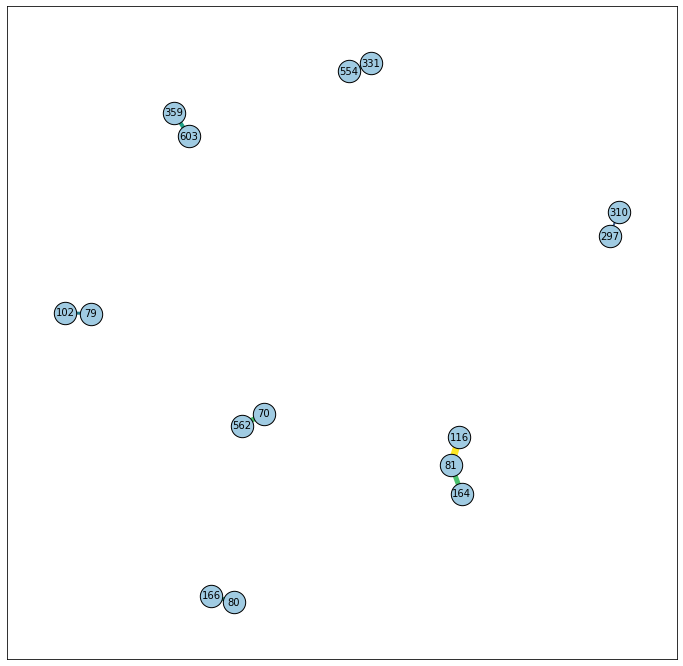

In [27]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

# Compute positions for viz.
#pos = nx.spring_layout(G)

pos = nx.spring_layout(G, k=0.10, iterations=20, seed=63)

#viz = nx.draw_networkx(G, 
#                       pos, 
#                       with_labels=True, node_size=300,font_size=10)

# Show it as an interactive plot!
plt.figure(1, figsize=(12,12)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]


nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=500,
                 font_size=10,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2",
                 edge_color=edge_colors,
                 edge_cmap=plt.cm.viridis,
                 edge_vmin=0, edge_vmax=np.max(edge_colors))

#labels = nx.get_edge_attributes(G,'Weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

#nx.draw_networkx_nodes(G, pos=pos)
#nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis, edge_vmin=0, edge_vmax=np.max(edge_colors), width=5)
#nx.draw_networkx_labels(G, pos=pos);

plt.show()

# Go with this one

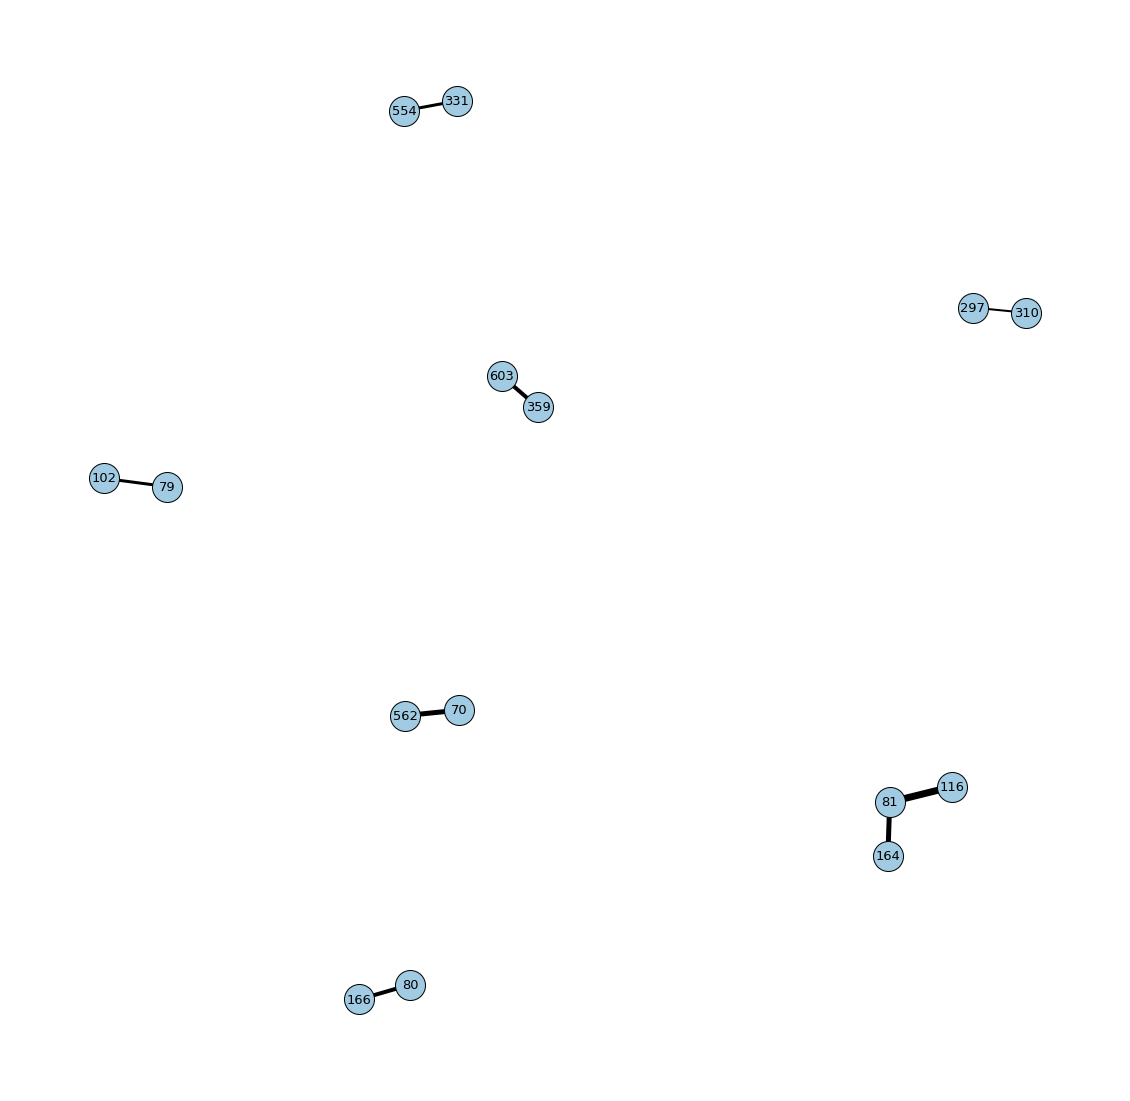

In [28]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

# Compute positions for viz.
#pos = nx.spring_layout(G)

pos = nx.spring_layout(G, k=0.08, iterations=20, seed=63)

#viz = nx.draw_networkx(G, 
#                       pos, 
#                       with_labels=True, node_size=300,font_size=10)

# Show it as an interactive plot!
plt.figure(1, figsize=(20,20)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]


nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=600*1.5,
                 font_size=10*1.3,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2")

#labels = nx.get_edge_attributes(G,'Weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

#nx.draw_networkx_nodes(G, pos=pos)
#nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis, edge_vmin=0, edge_vmax=np.max(edge_colors), width=5)
#nx.draw_networkx_labels(G, pos=pos);
plt.axis("off")

plt.savefig("REM2_BGM.png")
         
plt.show()

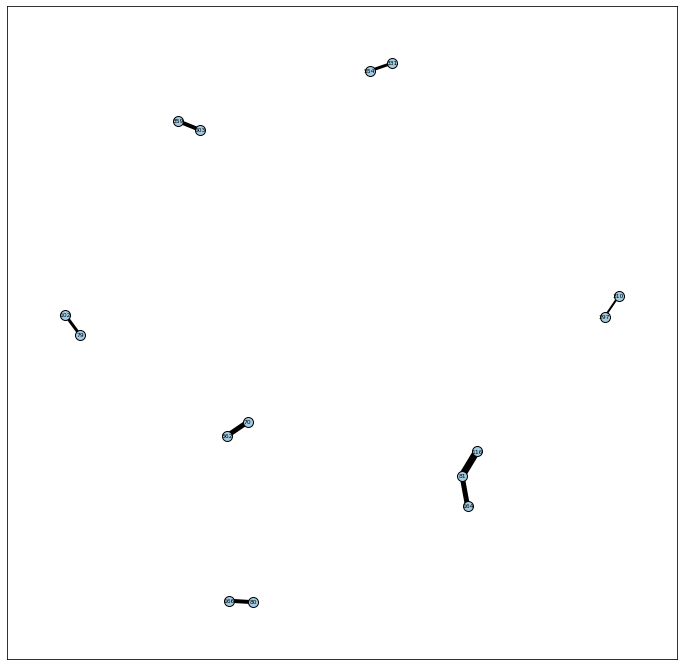

In [29]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

# Compute positions for viz.
#pos = nx.spring_layout(G)

pos = nx.spring_layout(G, k=0.09, iterations=20, seed=63)

#viz = nx.draw_networkx(G, 
#                       pos, 
#                       with_labels=True, node_size=300,font_size=10)

# Show it as an interactive plot!
plt.figure(1, figsize=(12,12)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]


nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=100,
                 font_size=6,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2")

#labels = nx.get_edge_attributes(G,'Weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

#nx.draw_networkx_nodes(G, pos=pos)
#nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis, edge_vmin=0, edge_vmax=np.max(edge_colors), width=5)
#nx.draw_networkx_labels(G, pos=pos);

plt.show()

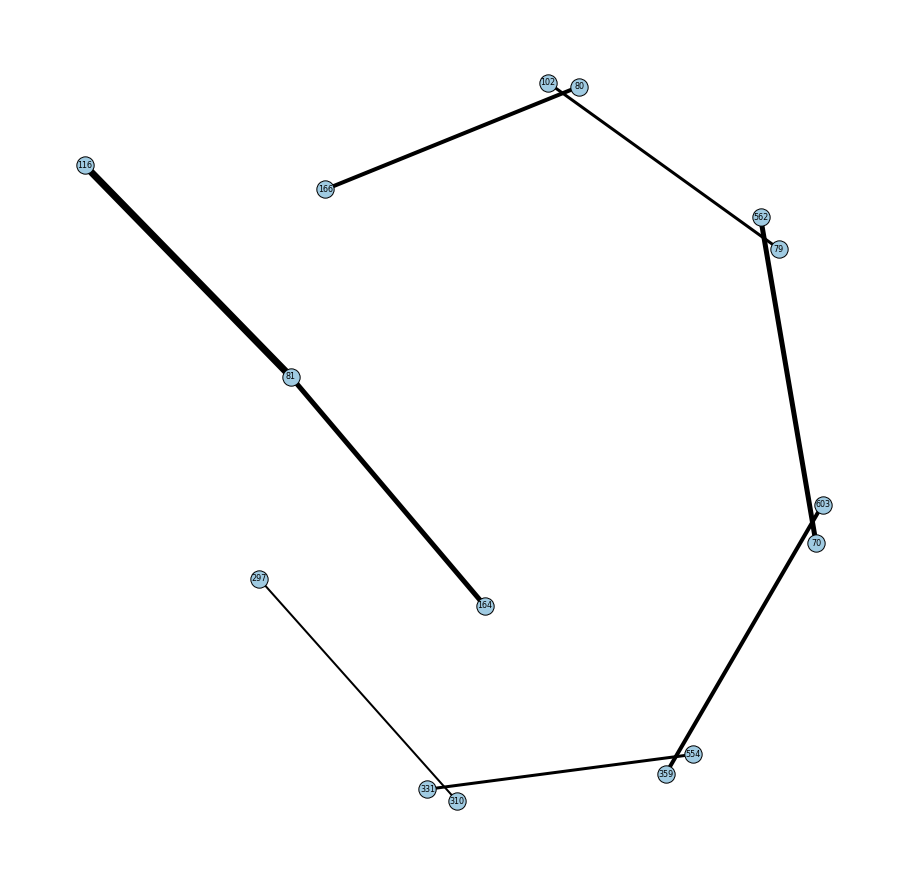

In [30]:
G  = nx.MultiDiGraph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

pos = nx.kamada_kawai_layout(G)

# Show it as an interactive plot!
plt.figure(1, figsize=(16,16)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]

nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=300,
                 font_size=8,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2")

#ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.show()

In [31]:
df4

,From,To,Weight,ProbS1andS2,HumanREM2_Site_1,HumanREM2_Site_2
11541,70,562,5,0.927454,37.0,NaN
12808,79,102,3,0.945109,45.0,66.0
13056,80,166,4,0.904362,46.0,130.0
13212,81,116,7,0.980401,47.0,80.0
13252,81,164,5,0.952407,47.0,128.0
26909,297,310,2,0.927730,NaN,177.0
29030,331,554,3,0.908855,198.0,NaN
30033,359,603,4,0.949875,NaN,NaN
